# Bayes Theorem for AB Testing

### Bayes Theorem: 

$$P(H | E) = \frac{P(E | H) * P(H)}{P(E)}$$

**Explained:** The probability of H given E is equal to the probability of E given H multiplied by the probability of H all divided by the probability of E.

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import beta
import seaborn as sns
from scipy import stats
import numpy as np

In [109]:
# Number of samples to run on monte carlo
N_samp = 1000000

In [82]:
# Uninformed prior (We don't make any assumptions and just set both to 0)
prior_a = 1.0
prior_b = 1.0

In [183]:
# Observed results
views_A = 6037
views_B = 6040
clicks_A = 3254
clicks_B = 3576

In [184]:
# Conversion Rates
print(f"Conversions for variant A are {round(clicks_A / views_A,2)*100}%", 
      f"while conversions for variant B are {round(clicks_B / views_B,2)*100}%")

Conversions for variant A are 54.0% while conversions for variant B are 59.0%


In [185]:
# Successes/Failures A 
A_successes = clicks_A
A_failures = views_A - A_successes

# Successes/Failures B
B_successes = clicks_B
B_failures = views_B - B_successes

In [186]:
# Run monte carlo simulation to create the beta distribution for each
A_posterior = beta(A_successes + prior_a, 
                   A_failures + prior_b, 
                   N_samp)
B_posterior = beta(B_successes + prior_a, 
                   B_failures + prior_b, 
                   N_samp)

### Plot the sample distributions based on the experiments

**NOTE:** Using two different methods of plotting (histogram vs shading) just for demonstrative purposes.

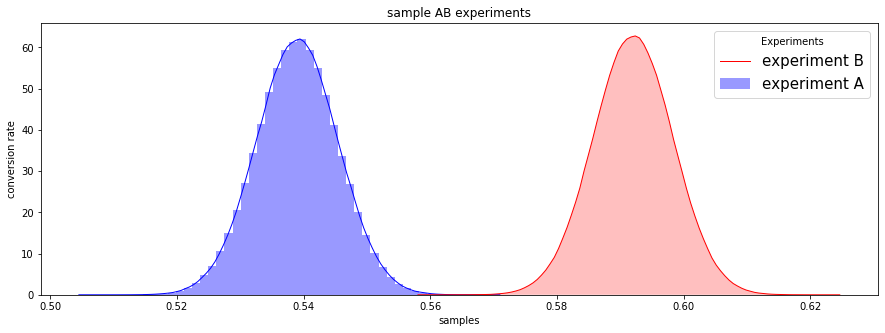

In [187]:
# Plot setup
plt.figure(figsize=[15,5])

# Plotting data
sns.distplot(A_posterior, hist=True, kde=True,
            color='blue', kde_kws={'linewidth':1},
            label='experiment A')
sns.distplot(B_posterior, hist=False, kde=True,
            color='red', kde_kws={'shade': True,'linewidth': 1},
            label='experiment B')

# Plotting formatting
plt.legend(prop={'size': 15}, title='Experiments')
plt.title('sample AB experiments')
plt.xlabel('samples')
plt.ylabel('conversion rate')
plt.show()

In [188]:
A_mean = round(np.mean(A_posterior), 2) * 100
B_mean = round(np.mean(B_posterior), 2) * 100

In [189]:
A_mean, B_mean

(54.0, 59.0)

### Plot the relative difference between experiment B and A

### Relative Difference:

$$ \frac{B\,conversion\,rate - A\,conversion\,rate}{A\,conversion\,rate} $$

**Explanation:** This is showing us the "lift" created from experiment B over experiment A. 

In [190]:
# Calculate relative difference
relative_difference = (B_posterior - A_posterior) / A_posterior

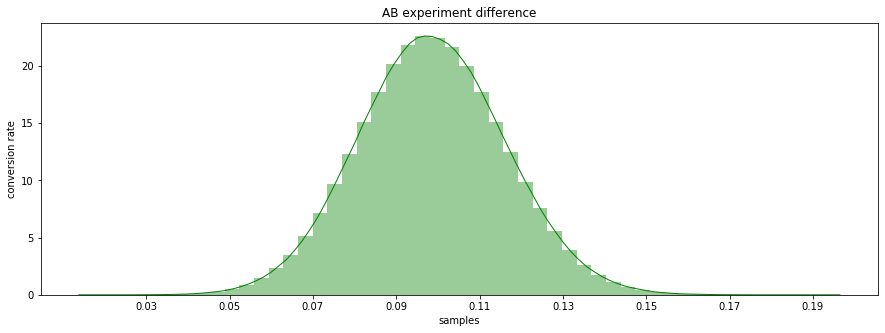

In [191]:
# Plot setup
plt.figure(figsize=[15,5])

# Plotting data
sns.distplot(relative_difference, hist=True, kde=True,
            color='green', kde_kws={'linewidth':1},
            label='experiment difference')


# Plotting formatting
plt.xticks(np.arange(round(min(relative_difference)+.01,2), 
                     round(max(relative_difference)+0.01,2), 
                     step=0.02))
plt.title('AB experiment difference')
plt.xlabel('samples')
plt.ylabel('conversion rate')
plt.show()

In [192]:
# How certain are we that lift exists?
lift_100 = np.percentile(relative_difference, 0)
print(f"We are 100% confident that variant B is better than variant A with the minimum lift being {round(lift_100*100,2)}%")

We are 100% confident that variant B is better than variant A with the minimum lift being 1.72%


In [193]:
# Upper and lower bounds at 95% interval
lower_bound = np.percentile(relative_difference, 2.5)
upper_bound = np.percentile(relative_difference, 97.5)

In [194]:
# Let's see what lift we get at 85%
lift_85 = np.percentile(relative_difference, 15)
print(f"We are 85% confident that the lift is at least {round(lift_85*100,2)}%")

We are 85% confident that the lift is at least 8.03%


In [195]:
# Let's see what lift we get at 5%
lift_5 = np.percentile(relative_difference, 95)
print(f"We are 5% confident that the lift is at least {round(lift_5*100,2)}%")

We are 5% confident that the lift is at least 12.77%


In [196]:
# Let's see what lift we get at 50%
lift_50 = np.percentile(relative_difference, 50)
print(f"We are 50% confident that the lift is at least {round(lift_50*100,2)}%")

We are 50% confident that the lift is at least 9.83%


In [197]:
# The maximum possible lift achieved from variant B
lift_0 = np.percentile(relative_difference, 100)
print(f"We are 100% confident that the lift is less than or equal to {round(lift_0*100,2)}%")

We are 100% confident that the lift is less than or equal to 19.31%


### Conclusion

We know that based on the above, we are certain that variant B creates a lift somewhere between 1.72% and 19.31%. This already states that we are 100% certain that variant B is better than variant A as it produces an absolute minimum lift greater than 0. Our expected lift based on the 50 percentile value of the relative difference is 9.83%. 
